In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [4]:
diabetes.shape

(778, 10)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.848329,120.822622,69.035990,20.457584,79.521851,31.982262,0.470871,33.317481,0.344473
std,3.360782,31.883264,19.432323,15.954452,114.862405,7.853917,0.330669,11.816300,0.475502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df = diabetes.drop_duplicates()
diabetes_df.shape

(768, 10)

In [8]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_df.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_df[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_df[col].nunique() / diabetes_df[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [9]:
info_diabetes = diabetes_df.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {info_diabetes.shape[1]}')

Результирующее число признаков: 9


In [12]:
info_diabetes[info_diabetes['Pregnancies'] == 0]['Pregnancies'].count()

111

In [16]:
print(
    info_diabetes[info_diabetes['Glucose'] == 0]['Glucose'].count(), 
    info_diabetes[info_diabetes['BloodPressure'] == 0]['BloodPressure'].count(), 
    info_diabetes[info_diabetes['SkinThickness'] == 0]['SkinThickness'].count(), 
    info_diabetes[info_diabetes['Insulin'] == 0]['Insulin'].count(), 
    info_diabetes[info_diabetes['BMI'] == 0]['BMI'].count()
    )

0 0 0 0 0


In [15]:
info_diabetes['Glucose'] = info_diabetes['Glucose'].replace(0, np.nan)
info_diabetes['BloodPressure'] = info_diabetes['BloodPressure'].replace(0, np.nan)
info_diabetes['SkinThickness'] = info_diabetes['SkinThickness'].replace(0, np.nan)
info_diabetes['Insulin'] = info_diabetes['Insulin'].replace(0, np.nan)
info_diabetes['BMI'] = info_diabetes['BMI'].replace(0, np.nan)

In [20]:
print(info_diabetes[info_diabetes['Insulin'].isna()].shape[0] / info_diabetes.shape[0])

0.4869791666666667


In [21]:
cols_null_percent = info_diabetes.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

In [22]:
info_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
5,6,103.0,72.0,32.0,190.0,37.7,0.324,55,0
6,1,71.0,48.0,18.0,76.0,20.4,0.323,22,0
7,0,117.0,NaN,NaN,NaN,33.8,0.932,44,0
8,4,154.0,72.0,29.0,126.0,31.3,0.338,37,0
9,5,147.0,78.0,NaN,NaN,33.7,0.218,65,0


In [28]:
#создаем копию исходной таблицы
drop_data = info_diabetes.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)#удаляем записи, в которых есть хотя бы 1 пропуск
#отображаем результирующую долю пропусков
drop_data.shape

(768, 8)

In [30]:
drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [31]:
drop_data.isnull().mean()

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [27]:
drop_data = drop_data.dropna(thresh=3, axis=0)
drop_data.shape

(768, 8)

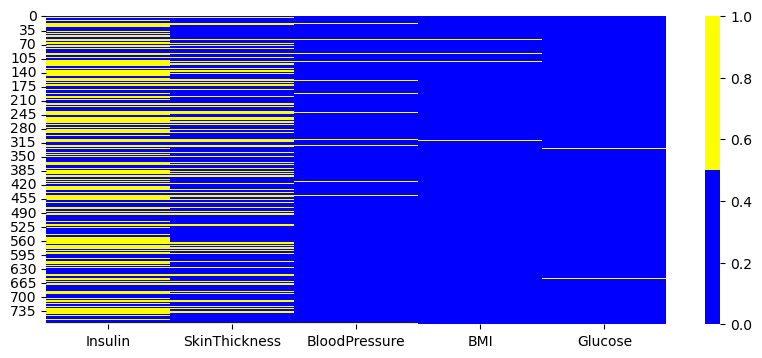

In [32]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    info_diabetes[cols].isnull(),
    cmap=sns.color_palette(colors),
)